This notebook contains code to plot scatterplots/boxplots of the accepted gamma distribution parameters by motif

In [29]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/supp_figures/motif_scatter_boxplots/'

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
    
    per = 4 # Change depending on what period you would like to plot
    
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['AAC','AAG','ACC','AGC'] #['AGG','CCG','ATC','AAT']##['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT']
    motif_dic[4] = ['AAAC','AAAG','AAAT', 'AGAT'] #['AAGG','ATCC','AATG','ACAT']#['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    motif_dic[5] = ['7','8','9','10','11','12'] #'9','10','11'
    
    opt_dic = {}
    opt_dic[2] = [11] # Change depending on what optimal allele you would like to plot
    opt_dic[3] = [5]
    opt_dic[4] = [7]
    opt_dic[5] = [7]
    
    # Plot prior
    xvals = []
    yvals = []
    prior_mean_s = []
    for i in range(0, 500):
        a = np.random.uniform() 
        # Mu - Mean value of the underlying normal distribution
        # Sigma - Standard deviation of the underlying normal distribution
        mu, sigma = np.log(0.0003), np.log(30)
        mean = np.random.lognormal(mu, sigma)
        b = mean/a
        xvals.append(a)
        yvals.append(b)
        prior_mean_s.append(a*b)
    plt.figure(1)
    plt.scatter(xvals,yvals,marker='.')
    plt.yscale('log')
    plt.title('Prior on a and b')
    plt.xlabel('a value')
    plt.ylabel('b value')
        
    print('Running main')
    
    folder = 'motif_analysis_diff_mu_071921'
    fig_num = 0
    
    color_list = ['red','orange','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','gold']
    
    color_list_opt = ['lightskyblue','deepskyblue','blue','midnightblue']
    color_dic = {}
    color_dic['AC'] = 'red'
    color_dic['AG'] = 'orange'
    color_dic['AT'] = 'lawngreen'
    color_dic['ACC'] = 'red'
    color_dic['AGG'] = 'orange'
    color_dic['AGC'] = 'lawngreen'
    color_dic['CCG'] = 'forestgreen'
    color_dic['AAG'] = 'turquoise'
    color_dic['AAC'] = 'blue'
    color_dic['ATC'] = 'purple'
    color_dic['AAT'] = 'brown'
    color_dic['AAGG'] = 'red'
    color_dic['AAAT'] = 'orange'
    color_dic['ATCC'] = 'lawngreen'
    color_dic['AATC'] = 'forestgreen'
    color_dic['AAAC'] = 'turquoise'
    color_dic['AATG'] = 'blue'
    color_dic['ACAT'] = 'purple'
    color_dic['AGAT'] = 'brown'
    color_dic['AAAG'] = 'gray'
    color_dic['7'] = 'red'
    color_dic['8'] = 'orange'
    color_dic['9'] = 'lawngreen'
    color_dic['10'] = 'forestgreen'
    color_dic['11'] = 'turquoise'
    color_dic['12'] = 'blue'
    
    #categories_list = [7,8,9,10,11,12]
    
    func_dic = {}
    func_dic['7'] = 'Coding'
    func_dic['8'] = 'Intron'
    func_dic['9'] = "5'UTR"
    func_dic['10'] = "3'UTR"
    func_dic['11'] = "Promoter"
    func_dic['12'] = "Intergenic"
    
    subplots_dic = {}
    subplots_dic[2] = [(3,4,1),(3,4,2),(3,4,3),(3,4,4),(3,4,5),(3,4,6),(3,4,7),(3,4,8),(3,4,10),(3,4,11)]
    subplots_dic[3] = [(3,3,1),(3,3,2),(3,3,3),(3,3,4),(3,3,5),(3,3,6),(3,3,7),(3,3,8),(3,3,9)]
    subplots_dic[4] = [(2,2,1),(2,2,2),(2,2,3),(2,2,4)]
    
    
    gamma_dic = {}
    color_dic_motif={}
    color_dic_opt={}
    i = -1
    for motif in motif_dic[per]:
        gamma_dic[motif] = []
        i = i + 1
        color_dic_motif[motif] = color_list[i]
        
    data = []
    x_label_motifs = []
    colors_bp = []
    # Plot motifs (sep graph for each opt allele)
    
    plt.figure(2)#,figsize=(5,5))
    for motif in motif_dic[per]:
        x_label_motifs.append(motif)
        opt_alleles = opt_dic[per]
        
        index = -1
        i = -1
        blue = 0
        for opt in opt_alleles:
            i = i + 1
            blue = blue + 0.07
            x = []
            y = []
            mean_s = []
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            
            
            file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/results_top_x/%s/per_%d_%s*_opt_%s.txt'%(folder, per, motif, opt_string))
            #file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/results_func_categ_top_x/%s/per_*%s*_opt_%s.txt'%(folder, motif, opt_string))
            print(file_list)
            file_list.sort() 
            
            base_plot = ''
            
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[4]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                
                # Uses actual num loci
                num_loci = int(info[2])
                
                if num_acc > 0: # and num_loci >= 10:

                    line = lines[2]
                    info = line.strip().split(': ')
                    column = info[1]
                    column = column.strip().split(' ')
                    column = int(column[0])
                    opt_allele = int(info[3])
                    
                    line = lines[6]
                    info = line.strip().split(',')
                    med_a = float(info[0])
                    med_b = float(info[1])
                    line = lines[10]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    params_list = []

                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[0])), float(param[1])))
                        x.append(float(param[0]))
                        y.append(float(param[1]))
                        mean_s.append(float(param[0])*float(param[1]))
                    
                    if column != 'H':
                        line = lines[6]
                        info = line.strip().split(',')
                        k = float(info[0])
                        theta = float(info[1])
                        
                        gamma_dic[motif].append((k, theta, num_loci, opt))
       
                    plt.scatter(x, y, label = motif, marker='.', c=color_dic[motif])#,c=color_list_opt[i])# c = (0.05, 0.05, blue))
                    #plt.scatter(x, y, label = func_dic[motif], marker='.', c=color_dic[motif])
                    plt.plot(med_a, med_b, marker='*',c=color_dic[motif],markeredgecolor= "black",markeredgewidth=3,markersize=20)#color_dic[motif])
                    plt.text(med_a+0.05, med_b,'s = %.2E'%(med_a * med_b))
                    colors_bp.append(color_dic[motif])
                    data.append(mean_s)
    plt.yscale('log')
    #plt.ylim([10**-7,1])
    plt.legend()
    plt.xlabel('a value')
    plt.ylabel('b value')
    plt.title('Accepted parameters: Optimal allele ' + str(opt_string))
    plt.savefig(PLOTDIR + 'scatter_per_%d_opt_%s.pdf'%(per,opt_string),bbox_inches='tight')
    #plt.title('Accepted parameters: Motif ' + str(motif))
 
    fig = plt.figure(3)

    # Creating axes instance
    #ax = fig.add_axes([0, 0, 1, 1])
    ax = fig.add_subplot(111)

    # Creating plot
    #data.append(prior_mean_s)
    bp = ax.boxplot(data, patch_artist=True)
    ax.set_yscale('log')
    #x_label_motifs.append('Prior')
    #colors_bp.append('gray')
    ax.set_xticklabels(x_label_motifs)
    
    ax.set_xlabel('Motif')
    ax.set_ylabel('Mean s value')
    for patch, color in zip(bp['boxes'], colors_bp):
        patch.set_facecolor(color)
    plt.savefig(PLOTDIR + 'box_per_%d_opt_%s.pdf'%(per,opt_string),bbox_inches='tight')
        
    for median in bp['medians']:
        median.set(color ='black',
                   linewidth = 1)
        

Running main
['/gymreklab-tscc/bonnieh/joint_method/results_top_x/motif_analysis_diff_mu_071921/per_4_AAAC_eurodem_prior2_tetranuc_d_1kg_euro_col_6_opt_07.txt']
['/gymreklab-tscc/bonnieh/joint_method/results_top_x/motif_analysis_diff_mu_071921/per_4_AAAG_eurodem_prior2_tetranuc_b_1kg_euro_col_6_opt_07.txt']
['/gymreklab-tscc/bonnieh/joint_method/results_top_x/motif_analysis_diff_mu_071921/per_4_AAAT_eurodem_prior2_tetranuc_c_1kg_euro_col_6_opt_07.txt']
['/gymreklab-tscc/bonnieh/joint_method/results_top_x/motif_analysis_diff_mu_071921/per_4_AGAT_eurodem_prior2_tetranuc_b_1kg_euro_col_6_opt_07.txt']
CPU times: user 1.3 s, sys: 55.8 ms, total: 1.36 s
Wall time: 1.36 s


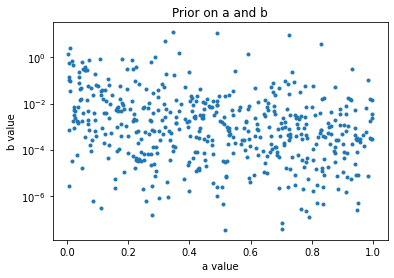

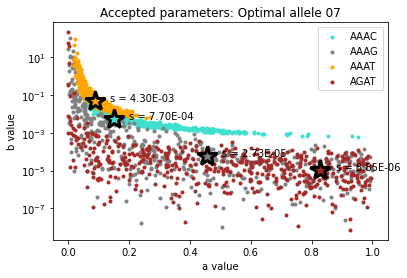

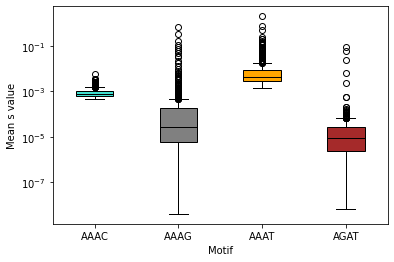

In [31]:
%%time
if __name__ == '__main__':
    main()